# SIFT (using opencv)

## Binary Image matching
Through the development of your own image stitching utility, you've learned the utility of being able to match keypoints in images, and how the process is done (find a good keypoint, extract a local descriptor, match these descriptors against each other).  However, the keypoint detection and matching that we implemented ourselves was sub-optimal in the sense that it did not preserve important invariances like rotation and scale.  For our endeavours into 3D scene reconstruction, we will instead switch to the de facto gold standard of keypoint matching methods, known as Scale Invariant Feature Transform, or SIFT.  

In essence, SIFT works just like Harris Corners, patch descriptors, and normalized SSE, with a few extra tweaks to make it better.  Instead of implementing SIFT ourselves, we will use the excellent implementation from OpenCV.  However, there is a small issue: SIFT is a non-free algorithm (it is free for academic use, but restricted from unlicensed commercial use).  As such it is not bundled with the standard OpenCV library.  Instead, it must be aquired separately.  However, this is made easy using pip (for those of you with linux or mac).  A simple

pip install --user opencv-contrib-python==3.4.2.17

will suffice to get both opencv and the non-free libraries associated with it. 

Once opencv is installed, it's straightforward to use with numpy.  The generation of SIFT keypoints and detectors is as follows:

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

I_1 = plt.imread('I_1.jpg')
I_2 = plt.imread('I_2.jpg')

sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.04,edgeThreshold=10,sigma=1.6)

#kp1 and kp2 - lists of keypoints
#des1 and des 2 - numpy array of shape Number_Of_Keypoints * 128
kp1,des1 = sift.detectAndCompute(I_1,None)
kp2,des2 = sift.detectAndCompute(I_2,None)

In [13]:

#plt.figure()
#plt.imshow(I_1)

It's as simple as that.  Now, with the keypoints and descriptors generated, we can match them using a simple $n^2$ matching utility (note that there are faster matchers out there that provide approximate matches).

In [15]:
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(des1,des2,k=2)

As before, we'll want to do some simple quality control, using the ratio test.  The matches object above is a list of lists, containing the best and second best matches according to the SSE error metric.  

In [17]:
print(matches[0])

[<DMatch 0x10f54de10>, <DMatch 0x10f121770>]


The error for each match can be found using match.distance

In [18]:
print(matches[0][0].distance)

195.28953552246094


**Code the ratio test.  Create a list of 'good' matches that pass the test**.

In [22]:
good_matches = []
for m,n in matches:
    # Compute the ratio between best match m, and second best match n here
    if m.distance < 0.5 * n.distance:
        good_matches.append((m, n))
    
    #pass
print(good_matches)

[(<DMatch 0x10f60a350>, <DMatch 0x10f60a370>), (<DMatch 0x10f60a710>, <DMatch 0x10f60a730>), (<DMatch 0x10f60a9d0>, <DMatch 0x10f60a9f0>), (<DMatch 0x10f60ab10>, <DMatch 0x10f60ab30>), (<DMatch 0x10f60ae90>, <DMatch 0x10f60aeb0>), (<DMatch 0x10f60bc10>, <DMatch 0x10f60bc30>), (<DMatch 0x10f60d3d0>, <DMatch 0x10f60d3f0>), (<DMatch 0x10f60d590>, <DMatch 0x10f60d5b0>), (<DMatch 0x10f60d650>, <DMatch 0x10f60d670>), (<DMatch 0x10f60d810>, <DMatch 0x10f60d830>), (<DMatch 0x10f60d950>, <DMatch 0x10f60d970>), (<DMatch 0x10f60d990>, <DMatch 0x10f60d9b0>), (<DMatch 0x10f60d9d0>, <DMatch 0x10f60d9f0>), (<DMatch 0x10f60dd10>, <DMatch 0x10f60dd30>), (<DMatch 0x10f60dd50>, <DMatch 0x10f60dd70>), (<DMatch 0x10ecd2f90>, <DMatch 0x10ecd2fb0>), (<DMatch 0x10ecd2fd0>, <DMatch 0x10ecd5030>), (<DMatch 0x10ecd51d0>, <DMatch 0x10ecd51f0>), (<DMatch 0x10ecd52d0>, <DMatch 0x10ecd52f0>), (<DMatch 0x10ecd5790>, <DMatch 0x10ecd57b0>), (<DMatch 0x10ecd5a50>, <DMatch 0x10ecd5a70>), (<DMatch 0x10ecd5a90>, <DMatch 0x

When this is complete, opencv offers you a mechanism for producing side-by-side keypoint match plots just like the ones you generated for Harris corners.  The syntax for this is straightforward:

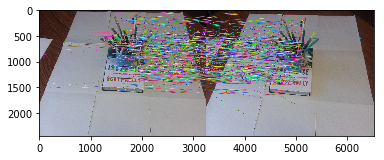

In [23]:
img = cv2.drawMatchesKnn(I_1,kp1,I_2,kp2,good_matches,None,flags=2) 
plt.imshow(img)

**Generate such a composite image using pictures that you take today in class (2 of the many), and using the good matches that you computed above**.

In [24]:
# Images from class 
I_1 = plt.imread('DSC03922.JPG')
I_2 = plt.imread('DSC03923.JPG')

sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.04,edgeThreshold=10,sigma=1.6)

#kp1 and kp2 - lists of keypoints
#des1 and des 2 - numpy array of shape Number_Of_Keypoints * 128
kp1,des1 = sift.detectAndCompute(I_1,None)
kp2,des2 = sift.detectAndCompute(I_2,None)

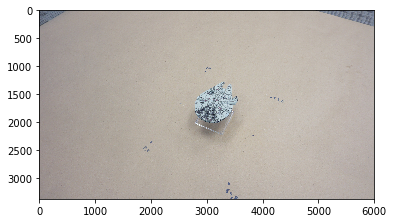

In [25]:
plt.figure()
plt.imshow(I_1)

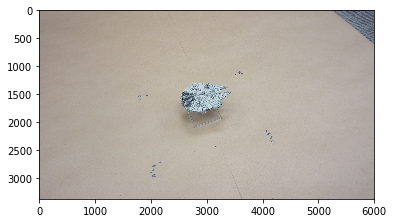

In [26]:
plt.figure()
plt.imshow(I_2)

In [27]:
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(des1,des2,k=2)
print(matches[0])
print(matches[0][0].distance)

good_matches = []
for m,n in matches:
    # Compute the ratio between best match m, and second best match n here
    if m.distance < 0.5 * n.distance:
        good_matches.append((m, n))
    
    #pass
print(good_matches)

[<DMatch 0x104cc7df0>, <DMatch 0x10ff839f0>]
196.95431518554688
[(<DMatch 0x1100be7d0>, <DMatch 0x1100be7f0>), (<DMatch 0x1100b90d0>, <DMatch 0x1100b90f0>), (<DMatch 0x10ffbbcd0>, <DMatch 0x10ffbbcf0>), (<DMatch 0x110143210>, <DMatch 0x110143230>), (<DMatch 0x110163910>, <DMatch 0x110163930>), (<DMatch 0x110163d10>, <DMatch 0x110163d30>), (<DMatch 0x110180d10>, <DMatch 0x110180d30>), (<DMatch 0x11018b150>, <DMatch 0x11018b170>), (<DMatch 0x11019b950>, <DMatch 0x11019b970>), (<DMatch 0x1101a6b50>, <DMatch 0x1101a6b70>), (<DMatch 0x1101bffd0>, <DMatch 0x1101c1030>), (<DMatch 0x1101c6cd0>, <DMatch 0x1101c6cf0>), (<DMatch 0x1101cfcd0>, <DMatch 0x1101cfcf0>), (<DMatch 0x1101dec50>, <DMatch 0x1101dec70>), (<DMatch 0x1101e1c50>, <DMatch 0x1101e1c70>), (<DMatch 0x1101e57d0>, <DMatch 0x1101e57f0>), (<DMatch 0x1101e59d0>, <DMatch 0x1101e59f0>), (<DMatch 0x1101f3310>, <DMatch 0x1101f3330>), (<DMatch 0x1101f7a50>, <DMatch 0x1101f7a70>), (<DMatch 0x1101f7b90>, <DMatch 0x1101f7bb0>), (<DMatch 0x1101

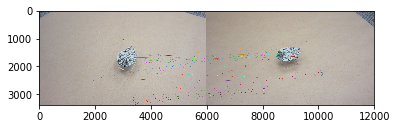

In [28]:
img = cv2.drawMatchesKnn(I_1,kp1,I_2,kp2,good_matches,None,flags=2) 
plt.imshow(img)